In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

In [2]:
# DATA 
import pandas as pd
cwd = os.chdir('/Users/jackcarter/Desktop/Missoula Data/Missoula Data Final /Moses Coulee')
dfa1 = pd.read_csv("a_b1_data.csv")
dfa2 = pd.read_csv("b_b1_data_y.csv")
dfa3 = pd.read_csv("e_b1_data_y.csv")
dfa4 = pd.read_csv("f_b1_data_y.csv")

In [3]:
dfa4.tail()

,Age,Age_Er,Ar40_,Ar40_Er,Ar39_,Ar39_Er,Pwr_Achieved,Dur_Heating_At_Req_Pwr,Run_Date,temp,temp_err,time,Da2,Da2_err
50,1577.429,30.97345,0.268062,0.000750,0.000909,0.000019,927,900,8/27/2019,927.000000,0.198013,897.083,0.000043,3.760000e-10
51,2776.687,279.48350,0.119588,0.000784,0.000309,0.000054,945,300,8/27/2019,944.981035,0.170095,296.676,0.000059,1.950000e-09
52,2665.410,347.33840,0.325590,0.011055,0.000642,0.000153,930,1800,8/27/2019,929.992458,0.211501,1796.705,0.000028,6.000000e-10
53,1405.534,68.74258,0.195120,0.000630,0.000513,0.000022,950,900,8/27/2019,949.996067,0.180195,897.094,0.000083,1.240000e-09
54,2300.021,464.07710,0.307632,0.011045,0.000474,0.000158,950,1800,8/27/2019,949.988827,0.193995,1796.684,inf,7.350000e-10


In [4]:
age1 = dfa1['Age'].values
age2 = dfa2['Age'].values
age3 = dfa3['Age'].values
age4 = dfa4['Age'].values

In [5]:
from scipy.stats import gaussian_kde
def kde_plot(x, grid, bandwidth = 20):
    y = gaussian_kde(x, bw_method = bandwidth / x.std(ddof =1))
    return y.evaluate(grid)


grid = np.linspace(0, 4600, 1000)

age1_kde = kde_plot(age1, grid, bandwidth = 5)
age2_kde = kde_plot(age2, grid, bandwidth = 5)
age3_kde = kde_plot(age3, grid, bandwidth = 5)
age4_kde = kde_plot(age4, grid, bandwidth = 5)




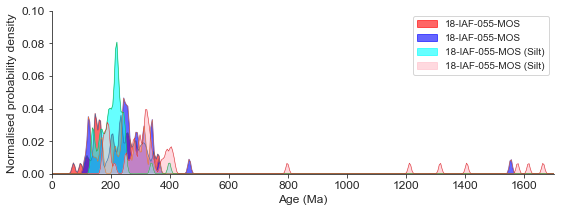

In [30]:
font = {"family": "Arial", 
       "weight": "normal", 
       "size": 12}

plt.rc("font", **font)
sns.set_style('ticks')

fig, ax = plt.subplots(1, 1, figsize= (9, 3))
"""
Plot
"""
ax.fill_between(grid, age1_kde/age1_kde.sum(), 
                  label = '18-IAF-055-MOS', 
                  color = 'r', 
                  alpha = 0.6)
ax.fill_between(grid, age2_kde/age2_kde.sum(), 
                  label = '18-IAF-055-MOS', 
                  color = 'b', 
                  alpha = 0.6)
ax.fill_between(grid, age3_kde/age3_kde.sum(), 
                  label = '18-IAF-055-MOS (Silt)', 
                  color = 'cyan', 
                  alpha = 0.6)
ax.fill_between(grid, age4_kde/age4_kde.sum(), 
                  label = '18-IAF-055-MOS (Silt)', 
                  color = 'pink', 
                  alpha = 0.6)


ax.plot(grid, age1_kde/age1_kde.sum(), 
          lw = 0.5)
ax.plot(grid, age2_kde/age2_kde.sum(), 
          lw = 0.5)
ax.plot(grid, age3_kde/age3_kde.sum(), 
          lw = 0.5)
ax.plot(grid, age4_kde/age4_kde.sum(), 
          lw = 0.5)

"""
Plot layout
"""

ax.set_xlim(0, 1700)

ax.set_ylim(0, 0.1)


"""
axis labels
"""

ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Normalised probability density')

ax.legend(fontsize = 10)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('/Users/jackcarter/Desktop/Missoula outputs/Moses_coulee_kde_plots.pdf')


In [18]:
"""
Model Ages
"""
"""
Model Ages
"""
cwd = os.chdir('/Users/jackcarter/Desktop/Missoula Models')


df_m1 = pd.read_csv('a_b1_age_comp.csv')

df_m2 = pd.read_csv('mc_bb1_age_comp.csv')

df_m3 = pd.read_csv('mc_eb1_age_comp.csv')

df_m4 = pd.read_csv('mc_fb1_age_comp.csv')

# Weighted mean age distribution plots

In [19]:
"""
Weights
"""
df_w1 = pd.read_csv('a_b1_w_comp.csv')

df_w2 = pd.read_csv('mc_bb1_w_comp.csv')

df_w3 = pd.read_csv('mc_eb1_w_comp.csv')


df_w4 = pd.read_csv('mc_fb1_w_comp.csv')

In [25]:
df_m3.head()

,Unnamed: 0,age1,age2,age3,age4,age5,age6,age7,age8
0,0,8.543472,798.689999,369.973197,284.568337,10.995697,322.631603,388.519044,106.896702
1,1,7.982248,798.148982,370.086341,284.510356,10.943735,322.473227,388.846603,106.579770
2,2,8.182631,798.605504,369.718216,285.193266,11.389181,322.691922,388.435809,105.316307
3,3,7.781366,798.413702,369.448340,284.806893,11.002855,321.811535,388.111116,105.926114
4,4,7.956800,798.368108,370.435288,285.219308,11.116738,321.638710,387.420217,105.524046


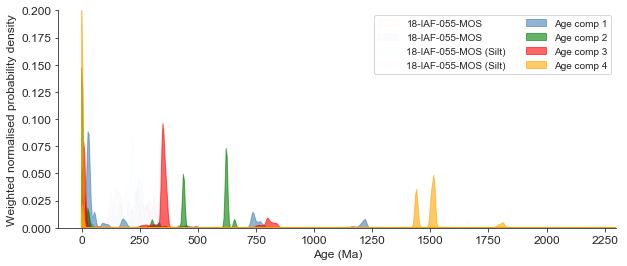

In [26]:
fig, ax = plt.subplots(1, 1, figsize= (10, 4))
"""
Plot
"""
#############################################
"""
Data
"""
ax.fill_between(grid, age1_kde/age1_kde.sum(), 
                  color = 'r', 
                  alpha = 0.01,
               label = '18-IAF-055-MOS')
ax.fill_between(grid, age2_kde/age2_kde.sum(), 
                  color = 'b', 
                  alpha = 0.01,
               label = '18-IAF-055-MOS')
ax.fill_between(grid, age3_kde/age3_kde.sum(), 
                  color = 'cyan', 
                  alpha = 0.01,
               label = '18-IAF-055-MOS (Silt)')
ax.fill_between(grid, age4_kde/age4_kde.sum(), 
                  color = 'pink', 
                  alpha = 0.01,
               label = '18-IAF-055-MOS (Silt)')


ax.plot(grid, age1_kde/age1_kde.sum(), 
          lw = 0.5, 
                  alpha = 0.01)
ax.plot(grid, age2_kde/age2_kde.sum(), 
          lw = 0.5, 
                  alpha = 0.01)
ax.plot(grid, age3_kde/age3_kde.sum(), 
          lw = 0.5, 
                  alpha = 0.01)
ax.plot(grid, age4_kde/age4_kde.sum(), 
          lw = 0.5, 
                  alpha = 0.01)

#############################################

"""
Model
"""

colors = ['r', 'g', 'b', 'y', 'steelblue', 
         'grey', 'seagreen', 'orange', 'pink']


        
for i in range(17): 
    
    ax.fill_between(grid, 
        kde_plot(df_m1[f'age{i+1}'].values, grid, bandwidth = 5)/kde_plot(df_m1[f'age{i+1}'], grid, bandwidth = 5).sum()*df_w1[f'w{i+1}'].mean(axis = 0),
                  alpha = 0.6, 
                      color = 'steelblue')

ax.fill_between(grid, 
        kde_plot(df_m1['age1'].values, grid, bandwidth = 5)/kde_plot(df_m1['age1'], grid, bandwidth = 5).sum()*df_w1[f'w{i+1}'].mean(axis = 0),
                  alpha = 0.6, 
                  label = 'Age comp 1', 
                      color = 'steelblue')
for i in range(10): 

    ax.fill_between(grid, 
        kde_plot(df_m2[f'age{i+1}'].values, grid, bandwidth = 5)/kde_plot(df_m2[f'age{i+1}'], grid, bandwidth = 5).sum()*df_w2[f'w{i+1}'].mean(axis = 0),
                  alpha = 0.6, 
                      color = 'green')

ax.fill_between(grid, 
        kde_plot(df_m2['age1'].values, grid, bandwidth = 5)/kde_plot(df_m2['age1'], grid, bandwidth = 5).sum()*df_w2[f'w{i+1}'].mean(axis = 0),
                  alpha = 0.6, 
                  label = 'Age comp 2', 
                      color = 'green')



for i in range(8): 

    ax.fill_between(grid, 
        kde_plot(df_m3[f'age{i+1}'].values, grid, bandwidth = 5)/kde_plot(df_m3[f'age{i+1}'], grid, bandwidth = 5).sum()*df_w3[f'w{i+1}'].mean(axis = 0),
                  alpha = 0.6, 
                      color = 'red')

ax.fill_between(grid, 
        kde_plot(df_m3['age1'].values, grid, bandwidth = 5)/kde_plot(df_m3['age1'], grid, bandwidth = 5).sum()*df_w3[f'w{i+1}'].mean(axis = 0),
                  alpha = 0.6, 
                  label = 'Age comp 3', 
                      color = 'red')



for i in range(5): 

    ax.fill_between(grid, 
        kde_plot(df_m4[f'age{i+1}'].values, grid, bandwidth = 5)/kde_plot(df_m4[f'age{i+1}'], grid, bandwidth = 5).sum()*df_w4[f'w{i+1}'].mean(axis = 0),
                      color = 'orange', 
                      alpha = 0.6)

ax.fill_between(grid, 
        kde_plot(df_m4['age1'].values, grid, bandwidth = 5)/kde_plot(df_m4['age1'], grid, bandwidth = 5).sum()*df_w4[f'w{i+1}'].mean(axis = 0),
                  alpha = 0.6, 
                  label = 'Age comp 4', 
                      color = 'orange')

"""
Plot layout
"""
ax.set_xlim(-100, 2300)

ax.set_ylim(0, 0.2)


"""
axis labels
"""

ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Weighted normalised probability density')

ax.legend(ncol = 2,
             fontsize = 10)




# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.locator_params(axis='x', nbins=10)

plt.savefig('/Users/jackcarter/Desktop/Missoula outputs/wnorm_moscou.png')

